# RainFall Prediction  ---- Logistic regression

In [1]:
# import required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
weather_data = pd.read_csv('weatherAUS_logistic_reg.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
weather_data.shape

(208495, 24)

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208495 entries, 0 to 208494
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           208495 non-null  object 
 1   Location       208495 non-null  object 
 2   MinTemp        205210 non-null  float64
 3   MaxTemp        205410 non-null  float64
 4   Rainfall       202565 non-null  float64
 5   Evaporation    98965 non-null   float64
 6   Sunshine       90293 non-null   float64
 7   WindGustDir    192729 non-null  object 
 8   WindGustSpeed  192836 non-null  float64
 9   WindDir9am     192360 non-null  object 
 10  WindDir3pm     199827 non-null  object 
 11  WindSpeed9am   204653 non-null  float64
 12  WindSpeed3pm   201241 non-null  float64
 13  Humidity9am    204144 non-null  float64
 14  Humidity3pm    200166 non-null  float64
 15  Pressure9am    185495 non-null  float64
 16  Pressure3pm    185514 non-null  float64
 17  Cloud9am       119419 non-nul

Categorical Variables --

In [5]:
# Unique values in categorical variables
cat_col = weather_data.select_dtypes(include=['object'])
cat_col.nunique()

Date            4745
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

It seems like there's a pre-defined set of directions (16 unique values) for columns pertaining to wind direction. There are also two dummy variables for RainToday and RainTomorrow. Lastly, there are 49 unique values in Location, which is assumed to be all in Australia.

The Date column also has a high number of unique values, which is something that will need to be adjusted before it goes into any model. Any columns with high cardinality will require some type of pre

In [6]:
weather_data['Location'].value_counts()

Canberra            4745
Sydney              4653
Darwin              4502
Hobart              4502
Brisbane            4502
Melbourne           4502
Perth               4501
Wollongong          4349
AliceSprings        4349
Launceston          4349
Townsville          4349
GoldCoast           4349
Cairns              4349
Ballarat            4349
Albury              4349
Albany              4348
MountGambier        4348
Tuggeranong         4348
Penrith             4348
Bendigo             4340
MountGinini         4337
Williamtown         4318
Richmond            4318
Cobar               4318
CoffsHarbour        4318
Moree               4318
Woomera             4318
NorfolkIsland       4318
Mildura             4318
Dartmoor            4318
Watsonia            4318
Portland            4318
WaggaWagga          4318
Sale                4318
MelbourneAirport    4318
SydneyAirport       4318
PerthAirport        4317
PearceRAAF          4317
Nuriootpa           4317
Walpole             4314


The Location column does not seem to have a huge issue, although we will have to do more digging to see.

RainTomorrow will be the response variable, as that is the column we are trying to predict.

Problems with Categorical variables

In [7]:
#Missing Values handles 

weather_data.isnull().sum()

Date                  0
Location              0
MinTemp            3285
MaxTemp            3085
Rainfall           5930
Evaporation      109530
Sunshine         118202
WindGustDir       15766
WindGustSpeed     15659
WindDir9am        16135
WindDir3pm         8668
WindSpeed9am       3842
WindSpeed3pm       7254
Humidity9am        4351
Humidity3pm        8329
Pressure9am       23000
Pressure3pm       22981
Cloud9am          89076
Cloud3pm          95092
Temp9am            3310
Temp3pm            7310
RainToday          5930
RISK_MM            5929
RainTomorrow       5929
dtype: int64

There seems to be a (relatively) high number of missing values. For now, we see that there are no missing values with Date, which is a good sign for our next steps in feature engineering.

Feature engg. for Date Column -- 

1. Year 
2. Month
3. Date

In [8]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

weather_data['year'] = weather_data['Date'].dt.year
weather_data['month'] = weather_data['Date'].dt.month
weather_data['day'] = weather_data['Date'].dt.day

weather_data[['Date','year','month','day']]

,Date,year,month,day
0,2008-12-01,2008,12,1
1,2008-12-02,2008,12,2
2,2008-12-03,2008,12,3
3,2008-12-04,2008,12,4
4,2008-12-05,2008,12,5
...,...,...,...,...
208490,2022-02-23,2022,2,23
208491,2022-02-24,2022,2,24
208492,2022-02-25,2022,2,25
208493,2022-02-26,2022,2,26


In [9]:
weather_data.drop('Date',axis=1,inplace=True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208495 entries, 0 to 208494
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       208495 non-null  object 
 1   MinTemp        205210 non-null  float64
 2   MaxTemp        205410 non-null  float64
 3   Rainfall       202565 non-null  float64
 4   Evaporation    98965 non-null   float64
 5   Sunshine       90293 non-null   float64
 6   WindGustDir    192729 non-null  object 
 7   WindGustSpeed  192836 non-null  float64
 8   WindDir9am     192360 non-null  object 
 9   WindDir3pm     199827 non-null  object 
 10  WindSpeed9am   204653 non-null  float64
 11  WindSpeed3pm   201241 non-null  float64
 12  Humidity9am    204144 non-null  float64
 13  Humidity3pm    200166 non-null  float64
 14  Pressure9am    185495 non-null  float64
 15  Pressure3pm    185514 non-null  float64
 16  Cloud9am       119419 non-null  float64
 17  Cloud3pm       113403 non-nul

Location column --

In [10]:
# Unique values

print(weather_data['Location'].value_counts())

print(' ')
print(' ')
print(f"Missing Values: {weather_data['Location'].isna().sum()}")

Canberra            4745
Sydney              4653
Darwin              4502
Hobart              4502
Brisbane            4502
Melbourne           4502
Perth               4501
Wollongong          4349
AliceSprings        4349
Launceston          4349
Townsville          4349
GoldCoast           4349
Cairns              4349
Ballarat            4349
Albury              4349
Albany              4348
MountGambier        4348
Tuggeranong         4348
Penrith             4348
Bendigo             4340
MountGinini         4337
Williamtown         4318
Richmond            4318
Cobar               4318
CoffsHarbour        4318
Moree               4318
Woomera             4318
NorfolkIsland       4318
Mildura             4318
Dartmoor            4318
Watsonia            4318
Portland            4318
WaggaWagga          4318
Sale                4318
MelbourneAirport    4318
SydneyAirport       4318
PerthAirport        4317
PearceRAAF          4317
Nuriootpa           4317
Walpole             4314


It seems that all we need to do is to capture this data using dummy variables. The best way to do this is to employ One-Hot Encoding

In [11]:
# One-Hot Encoding for Location column


pd.get_dummies(weather_data.Location,drop_first=True).head()   # 'drop first' means that we drop the first value if everything else is 0

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What we have now is 48 columns that represent our Location column. Instead of having one column that explains what location the data is from, now we have a dummy variable that represents this. This means that in every row of data, only one row will have a  1  that denotes where the Location is. Additionally, if everything is  0 , this means that it is referring to 'Albany'.

WindGustDir Column

In [12]:
print(weather_data['WindGustDir'].value_counts())

print(' ')
print(' ')
print(f"Missing Values: {weather_data['WindGustDir'].isna().sum()}")

W      14122
SE     13364
E      13074
S      13019
WSW    12959
N      12894
SSW    12819
SSE    12815
SW     12625
ENE    11713
WNW    11707
NW     11512
ESE    10792
NE     10340
NNE     9520
NNW     9454
Name: WindGustDir, dtype: int64
 
 
Missing Values: 15766


We can employ the same type of One-Hot encoding, but implement an additional value NaN for missing values. The reason why we are doing this is because we are not sure why there are missing values. It is best to leave it in.

In [13]:
# One-Hot Encoding for WindGustDir

pd.get_dummies(weather_data.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


WindDir9am column

In [14]:
print(weather_data['WindDir9am'].value_counts())

print(' ')
print(' ')
print(f"Missing Values: {weather_data['WindDir9am'].isna().sum()}")

N      16321
SE     13367
E      13304
SSE    13065
S      12295
NW     12187
SW     11990
W      11834
NNE    11693
ESE    11423
ENE    11255
NNW    11165
SSW    11003
NE     10906
WNW    10751
WSW     9801
Name: WindDir9am, dtype: int64
 
 
Missing Values: 16135


In [15]:
# One-Hot Encoding for WindDir9am

pd.get_dummies(weather_data.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


WindDir3pm column

In [16]:
print(weather_data['WindDir3pm'].value_counts())

print(' ')
print(' ')
print(f"Missing Values: {weather_data['WindDir3pm'].isna().sum()}")

SE     15053
W      14361
S      13797
WSW    13654
SSE    13001
SW     12976
WNW    12701
N      12402
ESE    12195
NW     12084
NE     11925
E      11832
SSW    11829
ENE    11306
NNW    11048
NNE     9663
Name: WindDir3pm, dtype: int64
 
 
Missing Values: 8668


In [17]:
# One-Hot Encoding for WindDir3pm

pd.get_dummies(weather_data.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


RainToday column

In [18]:
print(weather_data['RainToday'].value_counts())

print(' ')
print(' ')
print(f"Missing Values: {weather_data['RainToday'].isna().sum()}")

No     158288
Yes     44277
Name: RainToday, dtype: int64
 
 
Missing Values: 5930


In [19]:
# One-Hot Encoding for RainToday

pd.get_dummies(weather_data.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Continuous  Variables

In [20]:
#Missing Variables


var_data = weather_data.select_dtypes(include=['float64'])
var_data.isna().sum()

MinTemp            3285
MaxTemp            3085
Rainfall           5930
Evaporation      109530
Sunshine         118202
WindGustSpeed     15659
WindSpeed9am       3842
WindSpeed3pm       7254
Humidity9am        4351
Humidity3pm        8329
Pressure9am       23000
Pressure3pm       22981
Cloud9am          89076
Cloud3pm          95092
Temp9am            3310
Temp3pm            7310
RISK_MM            5929
dtype: int64

In [21]:
var_data = weather_data.select_dtypes(['float64'])
var_data.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,205210.0,205410.0,202565.0,98965.0,90293.0,192836.0,204653.0,201241.0,204144.0,200166.0,185495.0,185514.0,119419.0,113403.0,205185.0,201185.0,202566.0
mean,12.0,23.0,2.0,6.0,8.0,40.0,14.0,19.0,69.0,51.0,1018.0,1015.0,5.0,5.0,17.0,22.0,2.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,20.0,21.0,7.0,7.0,3.0,3.0,7.0,7.0,8.0
min,-9.0,-4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,979.0,979.0,0.0,0.0,-6.0,-5.0,0.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,36.0,1013.0,1010.0,1.0,2.0,12.0,17.0,0.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,6.0,5.0,17.0,21.0,0.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,66.0,1022.0,1020.0,7.0,7.0,22.0,26.0,1.0
max,34.0,49.0,474.0,139.0,14.0,135.0,87.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,48.0,474.0


Based on the table above, there may be outliers in Rainfall, Evaporation,Windspeed9am and Windspeed3pm. This is inferred from the difference between the row max and the other rows, and how far it is away from 75%.

Outliers in ( Rainfall, Evaporation, Windspeed9am, Windspeed3pm)

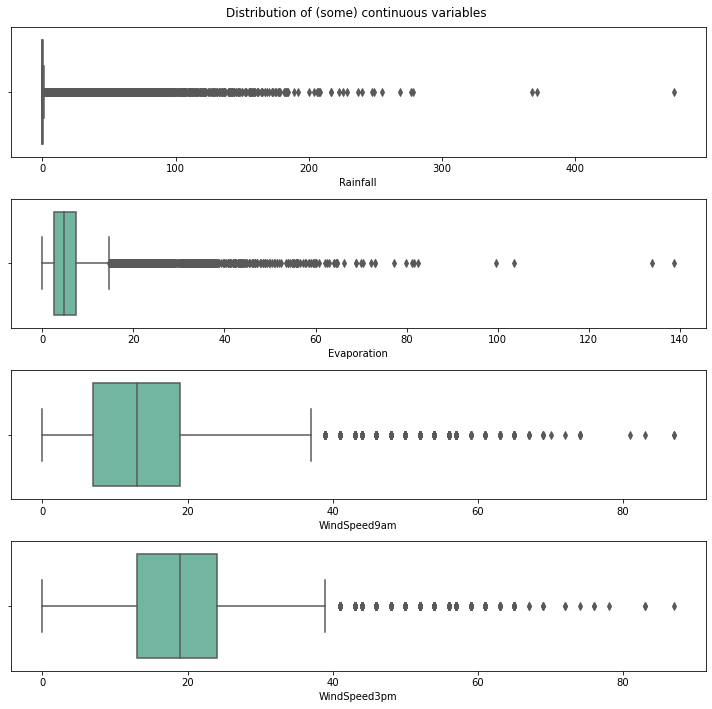

In [22]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.boxplot(x= 'Rainfall', data = weather_data, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Evaporation
sns.boxplot(x= 'Evaporation', data = weather_data, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Windspeed (9AM)
sns.boxplot(x= 'WindSpeed9am', data = weather_data, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

# Windspeed (3PM)
sns.boxplot(x= 'WindSpeed3pm', data = weather_data, palette = 'Set2', ax = axes[3])
axes[3].set_title("")

plt.tight_layout()

In fact, there are a lot of outliers in these four columns. Before removing any outliers, I should check how these columns are distributed. Any type of drastic skew will change the way I remove these outliers.

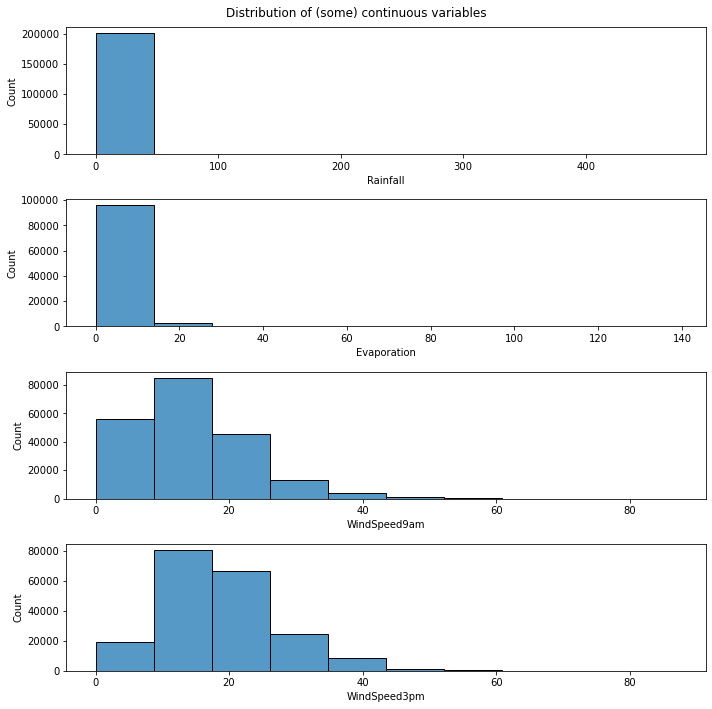

In [23]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.histplot(x= 'Rainfall', data = weather_data, palette = 'Set2', ax = axes[0], bins = 10)
axes[0].set_title("")

# Evaporation
sns.histplot(x= 'Evaporation', data = weather_data, palette = 'Set2', ax = axes[1], bins = 10)
axes[1].set_title("")

# Windspeed (9AM)
sns.histplot(x= 'WindSpeed9am', data = weather_data, palette = 'Set2', ax = axes[2], bins = 10)
axes[2].set_title("")

# Windspeed (3PM)
sns.histplot(x= 'WindSpeed3pm', data = weather_data, palette = 'Set2', ax = axes[3], bins = 10)
axes[3].set_title("")

plt.tight_layout()

IQR (Inter Qurtile Range) for all four columns

In [24]:
# Calculating IQR, Lower and Upper  loads for all 4 columns

for column in ['Rainfall','Evaporation','WindSpeed9am','WindSpeed3pm']:
    IQR = weather_data[column].quantile(0.75) - weather_data[column].quantile(0.25)
    Lower_fence = weather_data[column].quantile(0.25) - (IQR * 3)
    Upper_fence = weather_data[column].quantile(0.75) + (IQR * 3)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Rainfall outliers are values < -1.8 or > 2.4
Evaporation outliers are values < -11.8 or > 21.8
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


Lets look at a recap of all our columns, and what we are going to do with each one:

Date - turn into ‘year’, ‘month’, ‘day’\ Location - one-hot encoding, drop first, no missing data\ MinTemp - \ MaxTemp\ Rainfall - remove outliers < -1.8 or > 2.4\ Evaporation - remove outliers < -11.8 or > 21.8\ Sunshine\ WindGustDir - one-hot encoding, drop first, NaN for missing data\ WindGustSpeed\ WindDir9am - one-hot encoding, drop first, NaN for missing data\ WindDir3pm - one-hot encoding, drop first, NaN for missing data\ WindSpeed9am - remove outliers < -29.0 or > 55.0\ WindSpeed3pm - remove outliers < -20.0 or > 57.0\ Humidity9am\ Humidity3pm\ Pressure9am\ Pressure3pm\ Cloud9am\ Cloud3pm\ Temp9am\ Temp3pm\ RainToday - one-hot encoding, drop first, NaN for missing data\ RainTomorrow\ \ Now, we need to deal with the missing values.

Missing Values

We should only be filling in these missing values over the training dataset and not the train dataset, so lets split the data first and apply these measures along with all the other things listed in sections 2 and 3.

In [25]:
print(f"Number of Missing Values in response of variable: {weather_data['RainTomorrow'].isna().sum()}")

weather_data = weather_data.dropna (subset= ['RainTomorrow'])

print(f"Number of Missing values in response of Variable after dropping NA Values: {weather_data['RainTomorrow'].isna().sum()}")

Number of Missing Values in response of variable: 5929
Number of Missing values in response of Variable after dropping NA Values: 0


Splitting Data in Training and Test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = weather_data.drop(['RainTomorrow'],axis=1)
y = weather_data['RainTomorrow']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Categorical Feature 

In [29]:
categorical_cols = list(X_train.select_dtypes(include=['object']).columns)

X_train[categorical_cols].isna().sum()

Location           0
WindGustDir    11272
WindDir9am     12222
WindDir3pm      6347
RainToday       1537
dtype: int64

In [30]:
# Filling in Missing Values in X_trains with the mode


for i in categorical_cols:
    X_train[i].fillna(X_train[i].mode()[0],inplace=True)
    X_test[i].fillna(X_test[i].mode()[0],inplace=True)
    
    
# Cheching Missing values in X_train 

X_train[categorical_cols].isna().sum()

C:\Users\prade\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [31]:
# Checking missing values in X_test

X_test[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [32]:
# Encoding categorical variables
import category_encoders as ce

onehotencoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = onehotencoder.fit_transform(X_train)
X_test = onehotencoder.fit_transform(X_test)

X_train.head()

C:\Users\prade\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RISK_MM,year,month,day
89247,Sale,4.6,20.4,0.2,NaN,NaN,NW,37.0,N,WNW,...,7.0,NaN,14.3,19.9,0,1,1.6,2015,5,20
171308,PerthAirport,8.2,18.7,2.8,2.4,3.3,WSW,39.0,NNE,W,...,7.0,6.0,12.0,18.1,1,0,1.4,2020,6,13
192895,Launceston,3.3,15.4,9.0,NaN,NaN,NNW,57.0,WNW,WNW,...,8.0,8.0,12.4,12.9,1,0,16.0,2019,6,29
137232,Townsville,21.1,26.4,0.0,NaN,NaN,ESE,46.0,SSE,SE,...,8.0,8.0,23.1,26.2,0,1,0.0,2020,6,18
82197,Ballarat,10.7,19.9,0.0,NaN,NaN,NNW,59.0,W,WSW,...,1.0,NaN,15.2,18.3,0,1,0.0,2020,11,16


Continuous  Feature (Feature Engineering)

In [33]:
continuous_cols = list(X_train.select_dtypes(include=['float64']).columns)
X_train[continuous_cols].isna().sum()

MinTemp            843
MaxTemp            532
Rainfall          1537
Evaporation      84088
Sunshine         90928
WindGustSpeed    11192
WindSpeed9am      2587
WindSpeed3pm      5254
Humidity9am       1732
Humidity3pm       4839
Pressure9am      17309
Pressure3pm      17306
Cloud9am         67789
Cloud3pm         72509
Temp9am            926
Temp3pm           4037
RISK_MM              0
dtype: int64

In [34]:
# Filling in missing values

for column in continuous_cols:
    X_train[column].fillna(X_train[column].median(),inplace=True)
    X_test[column].fillna(X_test[column].median(),inplace=True)
    
# Checking missing values
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
RISK_MM          0
year             0
month            0
day              0
dtype: int64

In [35]:
X_test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
RISK_MM          0
year             0
month            0
day              0
dtype: int64

In [36]:
# Removing outliers in certain continous columns
def upper_outlier(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])
def lower_outlier(df, variable, bot):
    return np.where(df[variable]<bot, bot, df[variable])

for X_df in [X_train, X_test]:
    X_df['Rainfall'] = upper_outlier(X_df, 'Rainfall', 2.4)
    X_df['Rainfall'] = lower_outlier(X_df, 'Rainfall', -1.8)
    
    X_df['Evaporation'] = upper_outlier(X_df, 'Evaporation', 21.8)
    X_df['Evaporation'] = lower_outlier(X_df, 'Evaporation', -11.8)

    X_df['WindSpeed9am'] = upper_outlier(X_df, 'WindSpeed9am', 55.0)
    X_df['WindSpeed9am'] = lower_outlier(X_df, 'WindSpeed9am', -29.0)

    X_df['WindSpeed3pm'] = upper_outlier(X_df, 'WindSpeed3pm', 57.0)
    X_df['WindSpeed3pm'] = lower_outlier(X_df, 'WindSpeed3pm', -20.0)

X_train.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RISK_MM,year,month,day
count,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,...,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0,162052.0
mean,12.0,23.0,1.0,5.0,8.0,40.0,14.0,19.0,69.0,51.0,...,5.0,5.0,17.0,22.0,0.0,1.0,2.0,2015.0,7.0,16.0
std,6.0,7.0,1.0,3.0,3.0,13.0,9.0,9.0,19.0,21.0,...,2.0,2.0,7.0,7.0,0.0,0.0,9.0,4.0,3.0,9.0
min,-9.0,-4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-6.0,-5.0,0.0,0.0,0.0,2007.0,1.0,1.0
25%,8.0,18.0,0.0,5.0,8.0,31.0,7.0,13.0,57.0,36.0,...,4.0,5.0,12.0,17.0,0.0,1.0,0.0,2012.0,4.0,8.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,...,6.0,5.0,17.0,21.0,0.0,1.0,0.0,2015.0,7.0,16.0
75%,17.0,28.0,1.0,5.0,8.0,46.0,19.0,24.0,83.0,65.0,...,6.0,6.0,22.0,26.0,0.0,1.0,1.0,2019.0,10.0,23.0
max,34.0,49.0,2.0,22.0,14.0,135.0,55.0,57.0,100.0,100.0,...,9.0,9.0,40.0,48.0,1.0,1.0,474.0,2022.0,12.0,31.0


In [37]:
# Include the other columns that are to be encoded (outlined above)

X_train = pd.concat([X_train[continuous_cols], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_train.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_train.WindDir3pm, prefix = 'WD3pm')], axis=1)

X_test = pd.concat([X_test[continuous_cols], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_test.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_test.WindDir3pm, prefix = 'WD3pm')], axis=1)

Responce Variabels

In [38]:
y_train.isna().sum()

0

In [39]:
y_test.isna().sum()

0

Scaling 

In [40]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,...,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000
mean,12.091800,23.266309,0.539535,5.118781,8.123737,40.008263,14.030867,18.668717,68.621214,51.105867,...,0.053569,0.057889,0.066331,0.111520,0.062406,0.057321,0.062807,0.069021,0.061363,0.065621
std,6.417783,7.117642,0.919482,2.590240,2.533764,13.100524,8.806013,8.600545,19.422548,20.752393,...,0.225166,0.233534,0.248860,0.314776,0.241892,0.232456,0.242616,0.253491,0.239996,0.247619
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,18.000000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.900000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.700000,28.200000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.900000,2.400000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Scaling using min-max scaler

from sklearn.preprocessing import MinMaxScaler

In [42]:
cols = list(X_train.columns)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=[cols])

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test,columns=[cols])

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,...,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000,162052.000000
mean,0.488070,0.516345,0.224806,0.234806,0.560258,0.285776,0.255107,0.327521,0.686212,0.511059,...,0.053569,0.057889,0.066331,0.111520,0.062406,0.057321,0.062807,0.069021,0.061363,0.065621
std,0.150652,0.134295,0.383118,0.118818,0.174742,0.098500,0.160109,0.150887,0.194225,0.207524,...,0.225166,0.233534,0.248860,0.314776,0.241892,0.232456,0.242616,0.253491,0.239996,0.247619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380282,0.416981,0.000000,0.220183,0.586207,0.218045,0.127273,0.228070,0.570000,0.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483568,0.505660,0.000000,0.220183,0.586207,0.278195,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596244,0.609434,0.250000,0.220183,0.586207,0.330827,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Model Traing and Result 

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
logreg  = LogisticRegression()

In [46]:
logreg.fit(X_train,y_train)

C:\Users\prade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)

In [48]:
# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred) * 100, 2)}%')

Model accuracy score: 93.23%


This model accuracy is quite high, although we cannot make any inferences from this yet. For example, this might be a high score because our model is overfitting. We should not only test for overfitting, but also compare this to the null accuracy (when the model predicts the most frequent class)

In [49]:
# Additional Metrics

print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')

# Calculating null accuracy
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))
print(f'Null Accuracy score: {round(null_accuracy * 100, 2)}%')


Training set score: 90.36%
Test set score: 93.23%
Null Accuracy score: 78.35%


The null accuracy is significantly lower than that of our model, which is a great sign - it means that our model is better than if we predicted the most popular class every time. In other words, our model is better than nothing!

The training and test set are quite comparable, which means that there are little signs of overfitting. I may want to consider increasing the value of  C  for a more flexible model.

In [50]:
# Initiatlize the model with C=100
logreg_c100 = LogisticRegression(C=100)

# Fit the model
logreg_c100.fit(X_train, y_train)

print(f'Training set score: {round(logreg_c100.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg_c100.score(X_test, y_test) * 100, 2)}%')

C:\Users\prade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score: 93.56%
Test set score: 92.93%


In [51]:
# Initiatlize the model with C=50
logreg_c50 = LogisticRegression(C=50, solver='liblinear', random_state = 0)

# Fit the model
logreg_c50.fit(X_train, y_train)

print(f'Training set score: {round(logreg_c50.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg_c50.score(X_test, y_test) * 100, 2)}%')

Training set score: 97.23%
Test set score: 97.4%


In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.95      0.96      0.96     31744
         Yes       0.86      0.82      0.84      8770

    accuracy                           0.93     40514
   macro avg       0.90      0.89      0.90     40514
weighted avg       0.93      0.93      0.93     40514



The classification report provides a great summary of our model. The precision is the proportion of correctly predicted positive outcomes; the Recall is the proportion of correctly predicted actual positives; F1 score is the harmonic mean of precision and r ecall. Because we're only using one model, the F1 score is quite irrelevant in this case.

Overall, I'm quite happy with the results. The model has a model accuracy score of 95%, which means that it is an adequate model in predicting the raining status of given locations in Australia. Luckily, it seems that the model is predicting 'no rain tomorrow' more than 'rain tomorrow'.

The model does not show any signs of overfitting, which is also a great sign. I would recommend the following next steps for the model that can potentially improve its performance:

1. k-fold Cross Validation
2. Hyperparameter Optimization
3. Consider adjusting the threshold level.

In [68]:
Inter = logreg.intercept_
coeff = logreg.coef_

coeff_df = pd.DataFrame(coeff,columns=[X_train,y_train])

In [69]:
coeff_df

,"(MinTemp,)","(MaxTemp,)","(Rainfall,)","(Evaporation,)","(Sunshine,)","(WindGustSpeed,)","(WindSpeed9am,)","(WindSpeed3pm,)","(Humidity9am,)","(Humidity3pm,)",...,"(WD3pm_NNW,)","(WD3pm_NW,)","(WD3pm_S,)","(WD3pm_SE,)","(WD3pm_SSE,)","(WD3pm_SSW,)","(WD3pm_SW,)","(WD3pm_W,)","(WD3pm_WNW,)","(WD3pm_WSW,)"
RainTomorrow,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,...,No,No,No,No,Yes,No,No,No,Yes,No
0,2.25831,-5.532175,0.746604,0.225994,-1.108625,5.708864,-0.518757,-0.93477,-0.065746,4.285659,...,0.187149,0.185694,-0.169445,0.012869,-0.207478,-0.19483,-0.233948,-0.068042,0.019852,-0.118693
